# Latar Belakang 
Sebuah Supermarket ingin melakukan marketing campaign untuk mempromosikan dan meningkatkan penjualan produk-produknya.Penawaran-penawaran menarik telah diberikan kepada para pelanggan, tetapi upaya kampanye masih jauh dari kata berhasil.



# Referensi

* 2n Cycle / second cycle memiliki arti sama dengan Master degree - [https://www.studera.nu/startpage/higher-education/sweden/levels-degrees/]

## Pernyataan Masalah
Supermarket ingin meningkatkan jumlah pelanggan yang tertarik dengan kampanye yang ditawarkan.
Informasi ini diharapkan dapat membantu dalam peningkatkan efektivitas dari campaign yang dilakukan, sehingga akan meningkatkan penjualan pada produk-produknya.

Sebagai Data Analyst, kita akan mencoba menjawab pertanyaan berikut:
Bagaimana karakteristik pelanggan yang menerima dan menolak penawaran kampanye?

# Data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import normaltest, chi2_contingency,mannwhitneyu


### Supermarket Customers Data Dictionary

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last month

Berikut tampilan 10 baris teratas dari dataset Airbnb Listings Bangkok :

In [2]:
df = pd.read_csv('D:\Purwadhika\Capstone 2\Supermarket Customers.csv',sep='\t')
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


## Data Understanding and Cleaning

In [3]:
print(f'Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')
print(df.info())

Dataset memiliki 2240 baris dan 29 kolom
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 1

In [4]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
display(df.describe().iloc[:,:13],df.describe().iloc[:,14:], df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000


,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [6]:
# Untuk menampilkan info unique(jumlah, dan nilai unique)
pd.set_option('display.max_colwidth', None)

def unique_info(df):
    return pd.melt(df,value_vars=df.columns).groupby('variable')['value'].agg(n_unique=lambda x:x.nunique(),
                                                                            unique_value=lambda x:x.unique()).reset_index()
    
unique_info(df)

,variable,n_unique,unique_value
0,AcceptedCmp1,2,"[0, 1]"
1,AcceptedCmp2,2,"[0, 1]"
2,AcceptedCmp3,2,"[0, 1]"
3,AcceptedCmp4,2,"[0, 1]"
4,AcceptedCmp5,2,"[0, 1]"
5,Complain,2,"[0, 1]"
6,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
7,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
8,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
9,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"


Secara umum, kita bisa melihat bahwa:
* Dataset Supermarket Customers memiliki `2240` baris dan `29` kolom.
* Hanya kolom `income` yang memiliki missing value yaitu Nan.
* Kolom `Dt_Customer` berisi value berupa tanggal dengan data tipe object yang dimana seharusnya adalah tipe datetime.
* Kolom `Z_CostContact` dan `Z_Revenue` memiliki value yang sama dalam setiap baris datanya, maka dari itu kolom tersebut dapat kita hapus karena tidak akan berguna dalam analisa maupun proses membangun machine learning kita nantinya.
* Kolom `Year_Birth` memiliki nilai terkecil yaitu 1893, jika kita coba hitung umur dari pelanggan tersebut kita akan mendapatkan angka yang tidak masuk akal yaitu umur 110 ke atas, dan umur ini kita dapat dari saat pertama pelanggan tersebut mendaftar sebagai member pada supermarket.Sehingga dapat diasumsikan adanya error pada saat melakukan input data.(Tahun Dt_Customer - Year_Birth)
* Pada kolom `Education` terdapat nilai kategori yang memiliki arti yang sama, yaitu 2n Cycle dan Master.[https://www.studera.nu/startpage/higher-education/sweden/levels-degrees/]
* Sama halnya dengan `Marital_status` yang memiliki nilai diskrit yang memiliki arti yang bisa dibilang sama, seperti divorced dan widow dapat dikatakan tidak memiliki pasangan aka single, namun pada kolom ini juga terdapat nilai diskrit yang bisa menimbulkan kebingungan seperti YOLO dan Absurd.
* Kolom `ID` juga bisa dihapus karena tidak akan terpakai dalam analisis.

In [7]:
# Mengubah nama kategori agar lebih mudah dipahami orang awam dan menggabungkan nilai diskrit pada kolom Education
def edu_func(education):
    if education == 'Graduation':
        return 'S1'
    elif education in ['Master','2n Cycle']:
        return 'S2'
    elif education == 'PhD':
        return 'S3'
    else:
        return 'SMA'
    
df['Education'] = df['Education'].apply(edu_func)

In [8]:
#Menggabungkan nilai diskrit pada kolom Marital_Status yang memiliki arti yang sama
def marital_func(marital):
    if marital in 'Single,Divorced,Widow,Alone'.split(','):
        return 'not in relationship'
    elif marital in 'Together,Married'.split(','):
        return 'in relationship'
    else:
        return 'unknown'
df['Marital_Status'] = df['Marital_Status'].apply(marital_func)

In [9]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

### Missing Value

In [10]:
# Function untuk membuat dataframe berisi jumlah missing value dan persentasenya(Terbesar - Terkecil)
# Dan nama kolom yang memiliki missing value
def miss_info(df):
    pct = np.round(df.isna().sum()/df.shape[0]*100,2).sort_values(ascending=False)
    tot = df.isna().sum().sort_values(ascending=False)
    na_df = pd.DataFrame({'Total':tot,'Percent':pct})
    return na_df

miss_info(df)

,Total,Percent
Income,24,1.07
ID,0,0.00
MntGoldProds,0,0.00
Complain,0,0.00
AcceptedCmp2,0,0.00
AcceptedCmp1,0,0.00
AcceptedCmp5,0,0.00
AcceptedCmp4,0,0.00
AcceptedCmp3,0,0.00
NumWebVisitsMonth,0,0.00


* Terlihat kolom `income` memiliki proporsi missing value yang relatif kecil, jadi row dengan missing value bisa dihapus saja.

In [11]:
print(f'Dataset sebelum menghapus missing value : {df.shape}')
df.dropna(inplace=True)
print(f'Dataset setelah menghapus missing value : {df.shape}')

Dataset sebelum menghapus missing value : (2240, 27)
Dataset setelah menghapus missing value : (2216, 27)


### Outliers

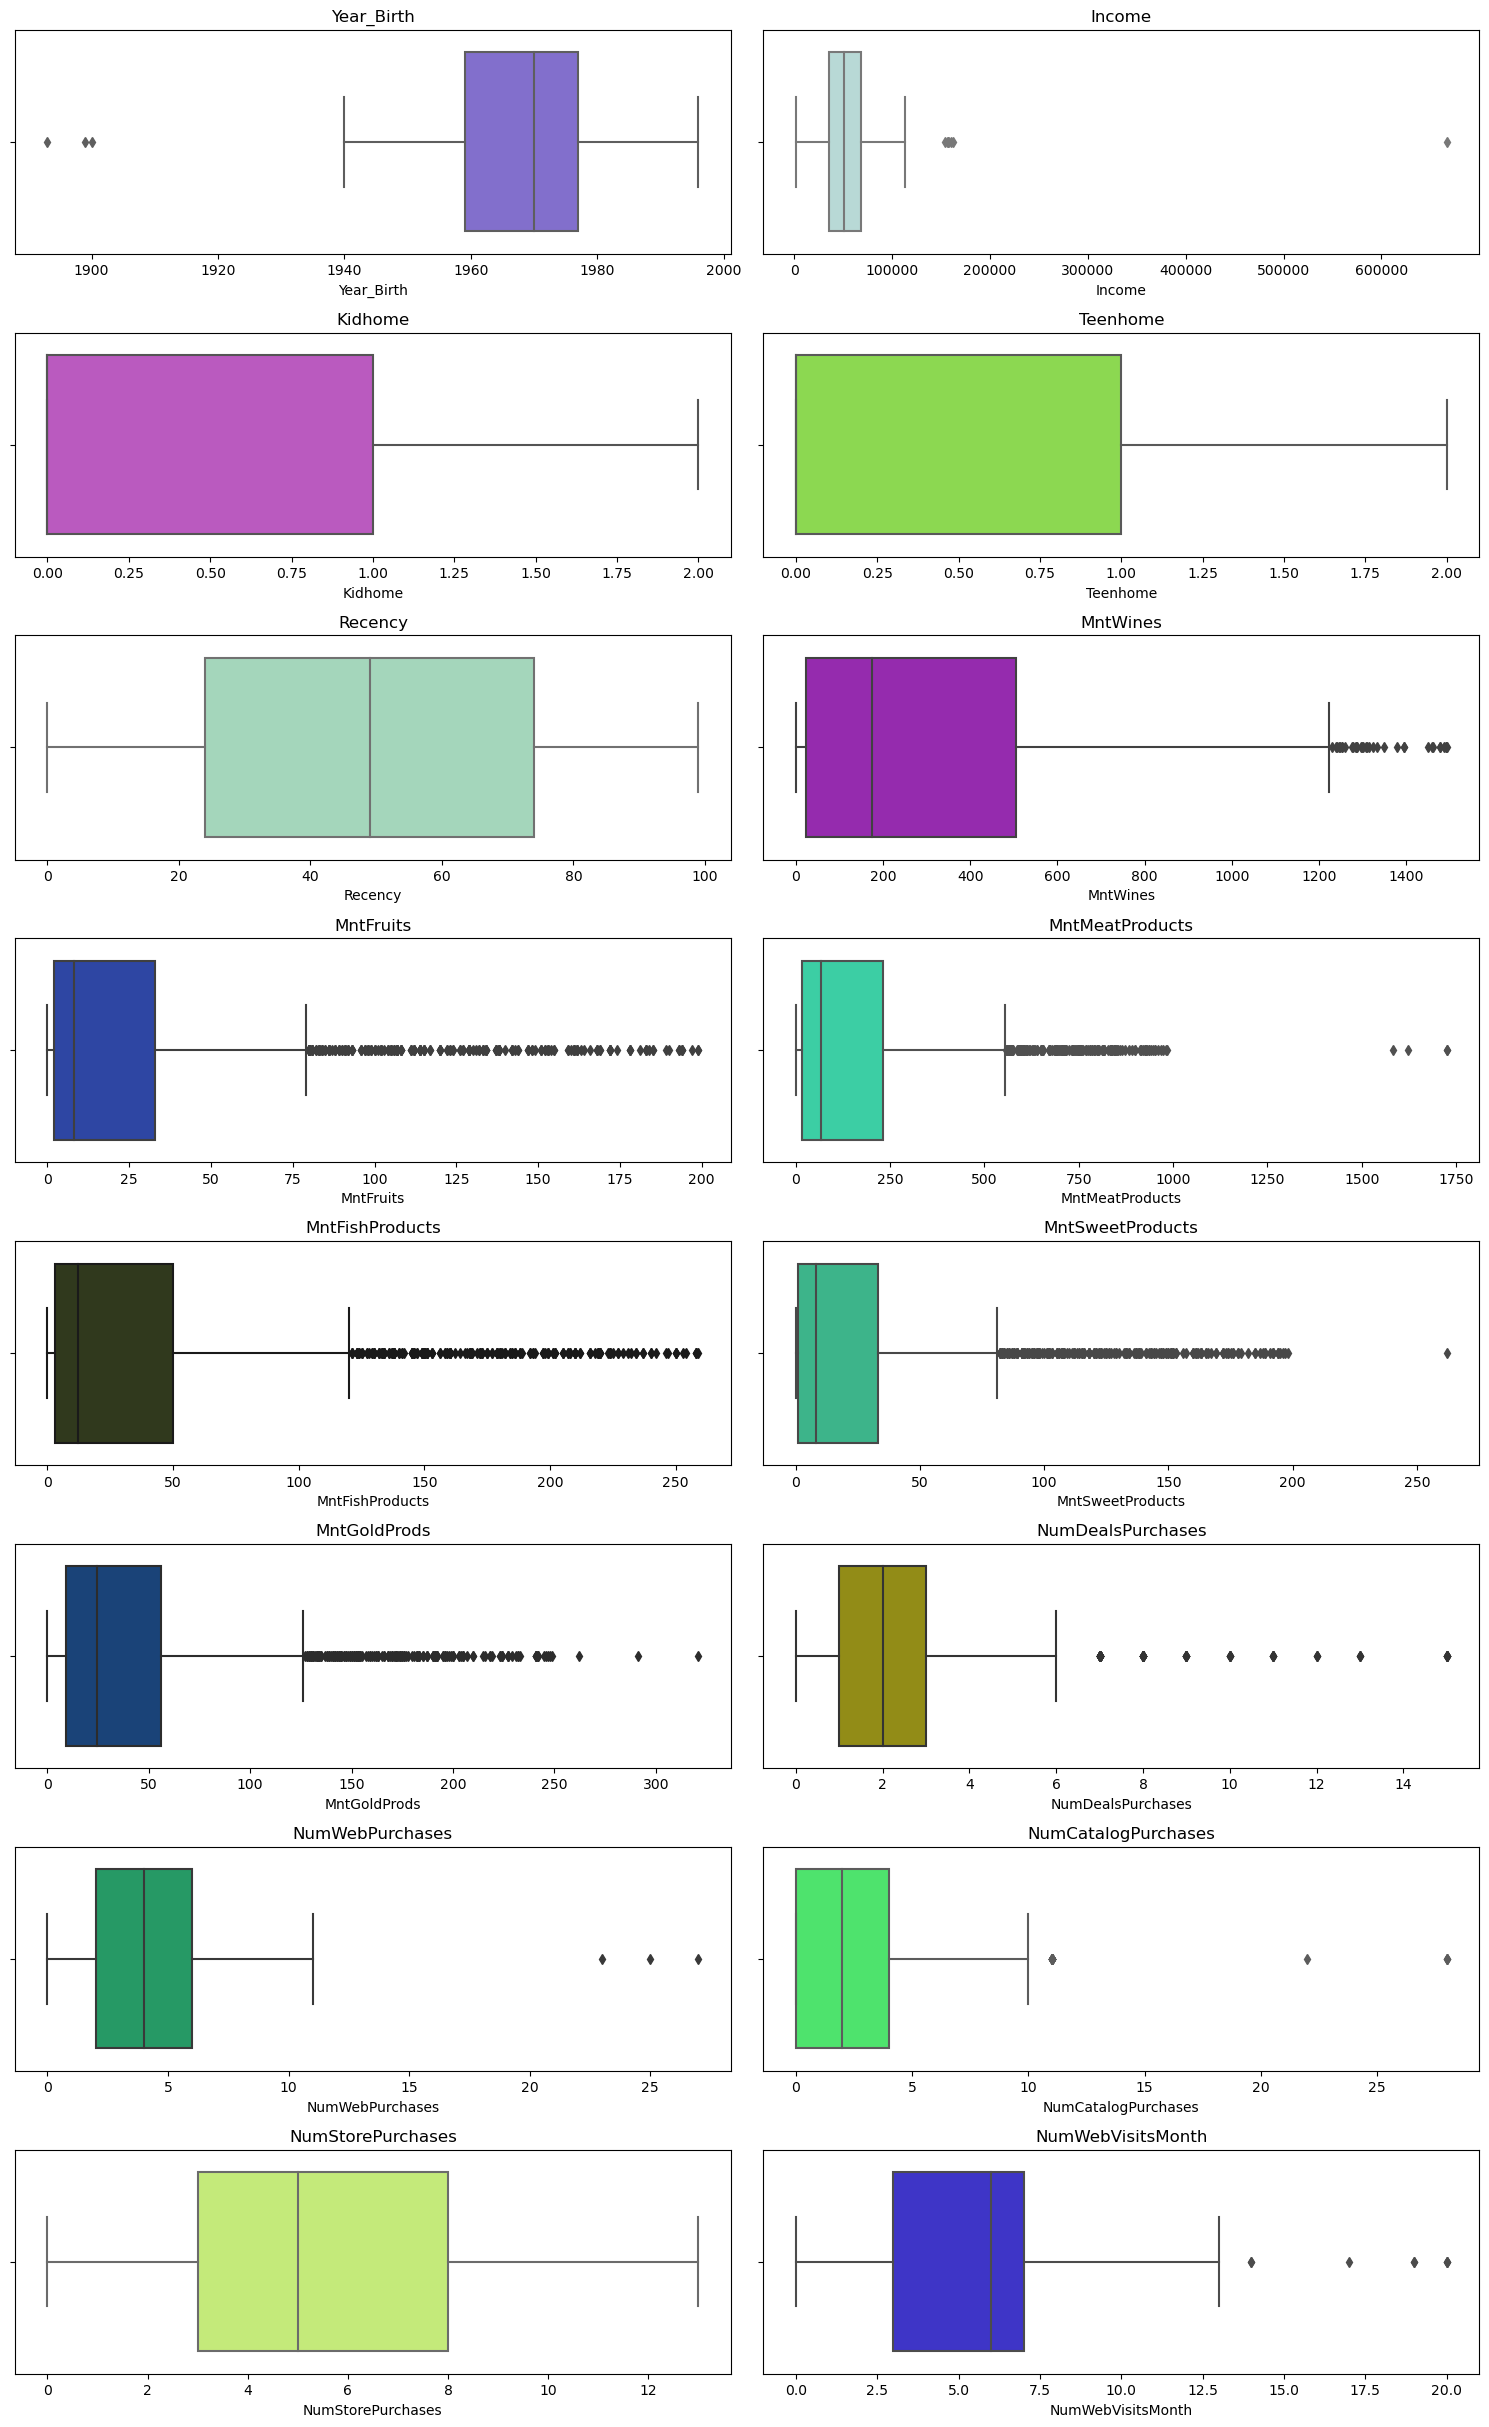

In [12]:
# Membuat boxplot untuk melihat outliers
columns_for_boxplot=['Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Mengambil warna secara acak
colors = ['#'+''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(columns_for_boxplot))]

num_cols = 2  
num_rows = 10  
total_plots = num_cols * num_rows 
num_plots = min(len(columns_for_boxplot), total_plots)

plt.figure(figsize=(15, 30))

for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(data=df,x=columns_for_boxplot[i],color=colors[i])
    plt.title(columns_for_boxplot[i])

plt.tight_layout()
plt.show()

In [25]:
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3-Q1
val = pd.to_datetime(df['Dt_Customer'],format="%d-%m-%Y").dt.to_period('Y').astype(str).astype(int) - df['Year_Birth']
age_df = pd.DataFrame({'Year_Birth':df['Year_Birth'],'Age_Enrollment':val})
age_df[age_df['Year_Birth']<Q1-1.5*IQR]


,Year_Birth,Age_Enrollment
192,1900,113
239,1893,121
339,1899,114


* Dari boxplot di atas terdapat beberapa kolom yang memiliki outlier, tapi dari sekian banyak kolom jika kita melihat dengan teliti pada kolom Year_Birth terdapat outliers yang merupakan data anomaly, baris data tersebut saya katakan anomaly karena jika kita melakukan perhitungan tahun dari `Dt_Customer` dikurangi dengan `Year_Birth `, kita mendapatkan umur dari customer tersebut saat mendaftar sebagai member, namun jika dilakukan perhitungan yang sama untuk outliers tersebut, kita mendapatkan beberapa customer yang berusia di atas 110 tahun.Maka dari itu, kita akan menghapus outliers pada kolom Year_Birth.
* Karena tujuan kita hanya untuk analisa, maka outlier pada kolom-kolom selain Year_Birth akan dibiarkan saja karena nilai-nilai ekstrim pada kolom tersebut memang bisa saja terjadi,seperti ada beberapa customer yang sangat kaya sehingga memiliki income yang jauh lebih besar daripada customer pada umumnya.

In [ ]:
df = df[df['Year_Birth']>(Q1 - 1.5 * IQR)]

* Saya menghilangkan data outlier dengan menggunakan IQR untuk menentukan batas bawahnya.

In [15]:
df.shape

(2213, 27)

* Data kita yang sebelumnya memiliki 2216 baris, sekarang tersisa 2213 baris.

### Data Type

* Data type pada kolom Dt_Customer memiliki type data berupa object, sehingga perlu diubah menjadi datetime.
* Data type pada kolom Year_Birth tidak perlu diubah, karena hanya berisi tahun.

In [16]:
# Mengubah datatype Dt_Customer menjadi datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format="%d-%m-%Y")

C:\Users\Steven\AppData\Local\Temp\ipykernel_11944\3614408986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format="%d-%m-%Y")


### Duplicate Data

In [17]:
df.duplicated().sum()

0

Di sini, kita melihat bahwa dataset Supermarket Customer tidak terdapat data yang duplikat.
Tapi jika kita telusuri lagi lebih lanjut, sebenarnya terdapat beberapa duplikat.

In [18]:
# Jumlah data duplikat tanpa ID
df.iloc[:,1:].duplicated().sum()

184

* Bisa kita lihat, setelah menyingkirkan kolom ID dalam filter duplikat, ternyata terdapat 184 data yang identik.
* Memang benar kolom ID mengandung nilai unique yang membedakan tiap customer, tapi jika kita pikir secara logika hampir tidak mungkin suatu baris data memiliki nilai yg identik pada seluruh kolomnya, seperti income, transaksi yang pernah dilakukan,dsb.
* Menurut saya, sebaiknya kita hapus saja data duplikatny untuk keperluan analisa, dan ID yang duplikat tersebut dapat kita kumpulkan untuk ditelusuri lebih lanjut nantinya jika diperlukan.

In [19]:
# Sebelum menghapus duplicate kita boleh menghapus kolom ID karena tidak diperlukan dalam analisa
df.drop('ID',axis=1,inplace=True)

C:\Users\Steven\AppData\Local\Temp\ipykernel_11944\1109082704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('ID',axis=1,inplace=True)


In [20]:
df.drop_duplicates(inplace=True)
df.shape

C:\Users\Steven\AppData\Local\Temp\ipykernel_11944\3054484884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


(2029, 26)

* Setelah menghapus data duplikat, jumlah baris data yang tadinya 2213 baris, kini tersisa 2029 baris.
Dan jumlah kolom kini adalah 26 kolom. 

# Data Analysis

Analisis dilakukan dengan membandingkan data customer yang menerima promo yang ditawarkan (target=1) dan menolak promo yang ditawarkan pada kampanye terakhir supermarket (target=0) berdasarkan fitur yang tersedia.

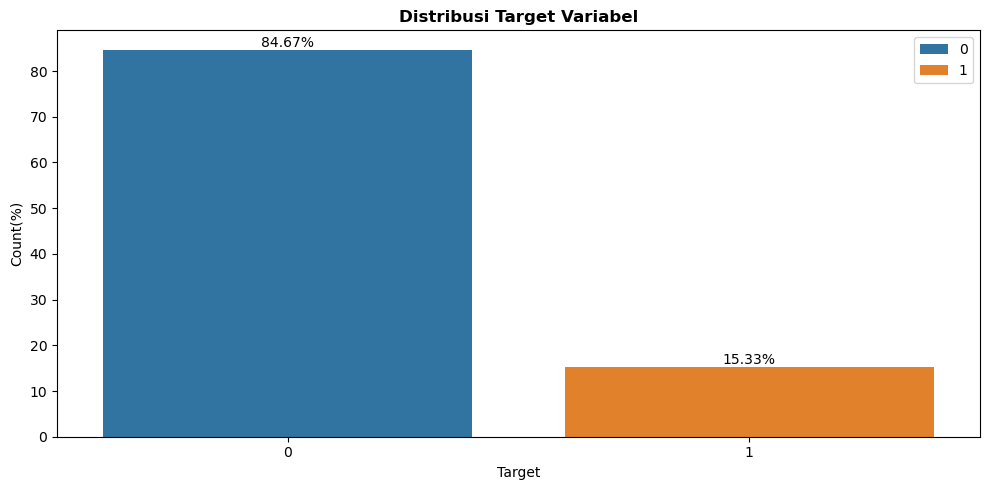

In [21]:
# Melihat Distribusi Target Variable (Response)
plt.figure(figsize=(10,5))
target_proporsi = (df['Response'].value_counts()/df.shape[0]*100).reset_index()
tar = sns.barplot(data=target_proporsi,x='Response',y='count',label=[0,1])
tar.bar_label(tar.containers[0],fmt='%.2f%%')
plt.title('Distribusi Target Variabel',fontweight='bold')
plt.ylabel('Count(%)')
plt.xlabel('Target') 
plt.legend()
plt.tight_layout()
plt.show()

* Dari visualisasi di atas, kita bisa melihat adanya class imbalance yang kuat pada target variable kita.
* Dari 2029 baris data, hanya 15% customer yang tertarik dengan promo yang ditawarkan supermarket. Hal ini mungkin saja disebabkan oleh customer yang tidak mengetahui kampanye yang dilakukan supermarket atau mungkin juga kampanye yang kurang menarik, dsb.

In [22]:
# Mengubah kolom Year_Birth menjadi categorical dan dikelompokkan berdasarkan era tahun
def year_era(x):
    if 1940 <= x < 1950:
        return "40s"
    elif 1950 <= x < 1960:
        return "50s"
    elif 1960 <= x < 1970:
        return "60s"
    elif 1970 <= x < 1980:
        return "70s"
    elif 1980 <= x < 1990:
        return "80s"
    else:
        return "90s"

df['Year_Birth']=df['Year_Birth'].apply(year_era)

C:\Users\Steven\AppData\Local\Temp\ipykernel_11944\1571119872.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Birth']=df['Year_Birth'].apply(year_era)


## Berdasarkan Tahun Kelahiran
* Customer supermarket didominasi oleh kelahiran era tahun berapa?
* Pada era tahun berapa yang memiliki jumlah tertinggi Customer yang menerima penawaran kampanye?
* Apakah era tahun kelahiran memiliki pengaruh terhadap proporsi customer yang menerima penawaran kampanye?

In [23]:
year_response = pd.crosstab(df['Year_Birth'],df['Response'])
year_response['Total'] = year_response.sum(axis=1)
year_response

Response,0,1,Total
Year_Birth,,,
40s,73,22,95
50s,365,56,421
60s,395,60,455
70s,579,96,675
80s,265,63,328
90s,41,14,55


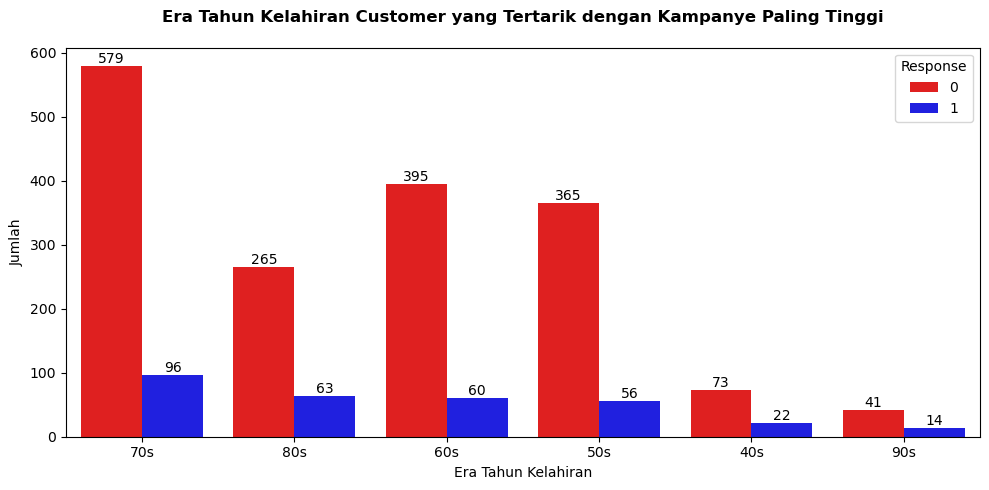

In [52]:
year_response_bar=df.groupby(['Year_Birth','Response']).agg(Jumlah=('Response','count')).reset_index().sort_values(['Response','Jumlah'],ascending=False)
plt.figure(figsize=(10,5))
year_bar=sns.barplot(data=year_response_bar,
            x='Year_Birth',y='Jumlah',hue='Response',palette=['r','b'])
for bars in year_bar.containers:
    year_bar.bar_label(bars)
plt.title('Era Tahun Kelahiran Customer yang Tertarik dengan Kampanye Paling Tinggi\n',fontweight='bold')
plt.xlabel('Era Tahun Kelahiran')
plt.tight_layout()
plt.show()

In [32]:
print('Rata-rata umur customer era 40an adalah {} tahun'.format(round(age_df[age_df['Year_Birth']<1950]['Age_Enrollment'].mean())))

Rata-rata umur customer era 40an adalah 68 tahun


* Customer supermarket didominasi oleh kelahiran era tahun berapa?
    * Dari `crosstab` dan `bar chart` di atas, kita bisa melihat bahwa customer supermarket didominasi oleh customer yang lahir pada era tahun 70an dan diikuti oleh tahun 60an.Jika kita lihat dengan teliti, sangat sedikit customer yang berasal dari tahun 40an dan 90an.Hal ini bisa dikarenakan customer yang berasal dari tahun 40an tentunya akan jarang berbelanja sendiri karena faktor usia, sedangkan customer era 90an masih belum banyak yang mapan dan memiliki rumah tangga sendiri sehingga masih hidup dengan orangtua. 
* Pada era tahun berapa yang memiliki jumlah tertinggi Customer yang tertarik dengan kampanye?
    * Jumlah tertinggi customer yang tertarik dengan kampanye yang dilakukan supermarket juga berasal dari era tahun 70an.
* Dari insight di atas, kita belum dapat menarik kesimpulan bahwa secara proporsi ketertarikan customer pada kampanye juga berasal dari era tahun 70an, maka dari itu kita akan melakukan analisa lebih dalam.

In [25]:
year_response_pct = pd.crosstab(df['Year_Birth'],df['Response'],normalize='index')*100
year_response_pct

Response,0,1
Year_Birth,,
40s,76.842105,23.157895
50s,86.698337,13.301663
60s,86.813187,13.186813
70s,85.777778,14.222222
80s,80.792683,19.207317
90s,74.545455,25.454545


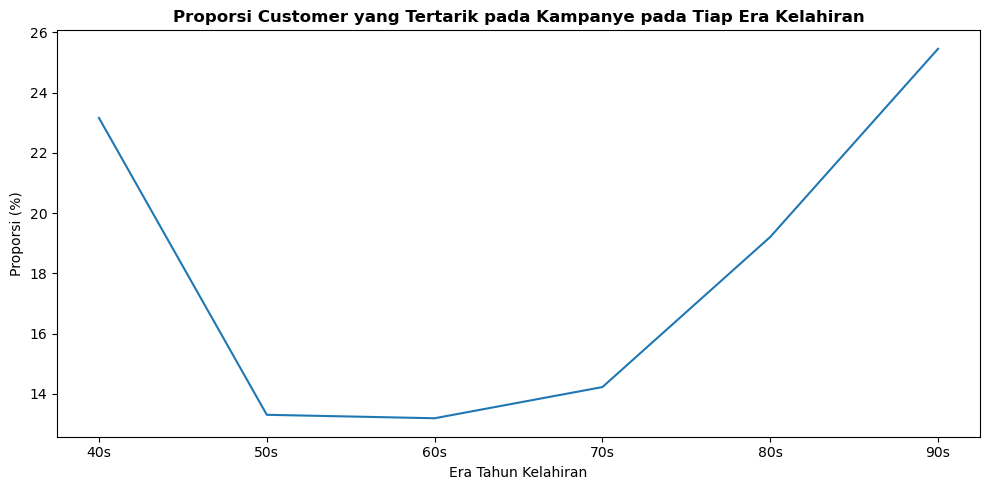

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(data=year_response_pct,x='Year_Birth',y=1)
plt.title('Proporsi Customer yang Tertarik pada Kampanye pada Tiap Era Kelahiran',fontweight='bold')
plt.xlabel('Era Tahun Kelahiran')
plt.ylabel('Proporsi (%)')
plt.tight_layout()
plt.show()

* Apakah era tahun kelahiran memiliki pengaruh terhadap proporsi customer yang menerima penawaran kampanye?
    * Di sini kita bisa melihat, ternyata ada tren kenaikan proporsi customer yang menerima penawaran pada kampanye dari tahun 60an hingga 90an yang merupakan puncaknya.Hal ini bisa disebabkan karena seseorang yang berusia muda cenderung lebih melek teknologi dan lebih aktif, sehingga memudahkan penawararan kampanye supermaket untuk menjangkau customer tersebut melalui e-mail,tv,dsb.
* Namun dari insight di atas terdapat kontradiksi, dimana era 40an yang merupakan kelompok customer dengan usia paling tua justru memiliki proporsi tertinggi ke-2 setelah era 90an,maka dari itu kita akan coba gali lebih dalam.


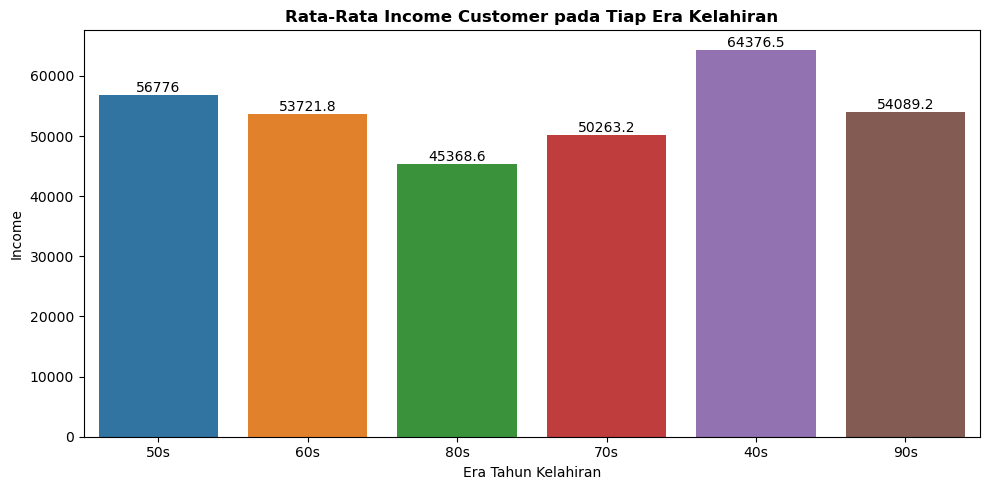

In [27]:
# Melihat rata-rata income pada tiap era 
plt.figure(figsize=(10,5))
year_income_bar = sns.barplot(data=df,x='Year_Birth',y='Income',errorbar=('ci', False))
year_income_bar.bar_label(year_income_bar.containers[0])
plt.title('Rata-Rata Income Customer pada Tiap Era Kelahiran',fontweight='bold')
plt.xlabel('Era Tahun Kelahiran')
plt.tight_layout()
plt.show()

* Dari bar chart di atas kita melihat customer yang lahir pada era 40an memiliki income yang paling tinggi, namun apakah income yang tinggi berpengaruh pada keputusan customer untuk menerima penawaran kampanye?Pada scatterplot di bawah saya akan melihat korelasi antara income dan total penawaran yang telah diterima sebelumnya.Kolom total penawaran diterima ini didapat dari penjumlahan tiap kolom accepted_cmp.

C:\Users\Steven\AppData\Local\Temp\ipykernel_11944\392857151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_acc_camp'] = df[[col for col in df.columns if 'Accepted' in col]].sum(axis=1)
c:\Users\Steven\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Steven\AppData\Local\Temp\ipykernel_11944\392857151.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


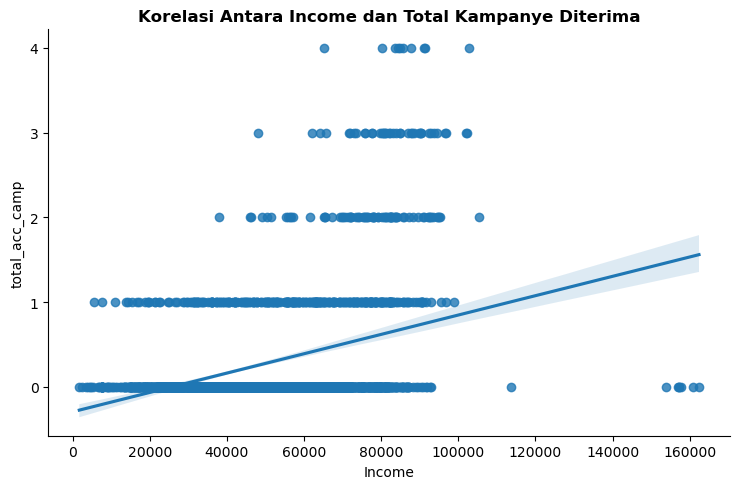

In [28]:
#Feature baru berisi jumlah kampanye sebelumnya yang diterima oleh customer
df['total_acc_camp'] = df[[col for col in df.columns if 'Accepted' in col]].sum(axis=1)
# Melihat hubungan antara income dengan total penawaran kampanye yang diterima oleh customer
# Saya membuang angka yang terlalu besar agar scatterplot terlihat lebih jelas
sns.lmplot(data=df[df['Income']<600000],x='Income',y='total_acc_camp',height=5, aspect=1.5)
plt.title('Korelasi Antara Income dan Total Kampanye Diterima',fontweight='bold')
plt.tight_layout()
plt.show()


* Ternyata memang benar semakin besar income customer, semakin besar juga kemungkinan mereka menerima penawaran kampanye.Maka bisa kita tarik kesimpulan bahwa customer yang lahir pada era 40an memiliki persentase tertinggi ke-2 untuk menerima penawaran kampanye disebabkan oleh income yang tinggi.Memang wajar, orang dengan income yang tinggi tidak perlu berpikir dua kali untuk membeli barang yang diinginkan, sebaliknya income yang kecil cenderung lebih hemat. 

## Berdasarkan Edukasi
* Pada jenjang pendidikan apa yang memiliki paling banyak customer yang menerima penawaran kampanye?

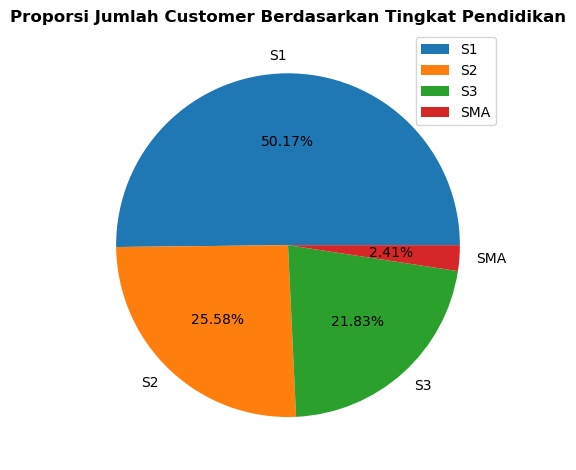

In [29]:
plt.pie(x='count',labels='Education',data=df['Education'].value_counts().reset_index(),autopct='%.2f%%')
plt.title('Proporsi Jumlah Customer Berdasarkan Tingkat Pendidikan',fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

Response,0,1
Education,,
S1,86.051081,13.948919
S2,85.549133,14.450867
S3,79.232506,20.767494
SMA,95.918367,4.081633


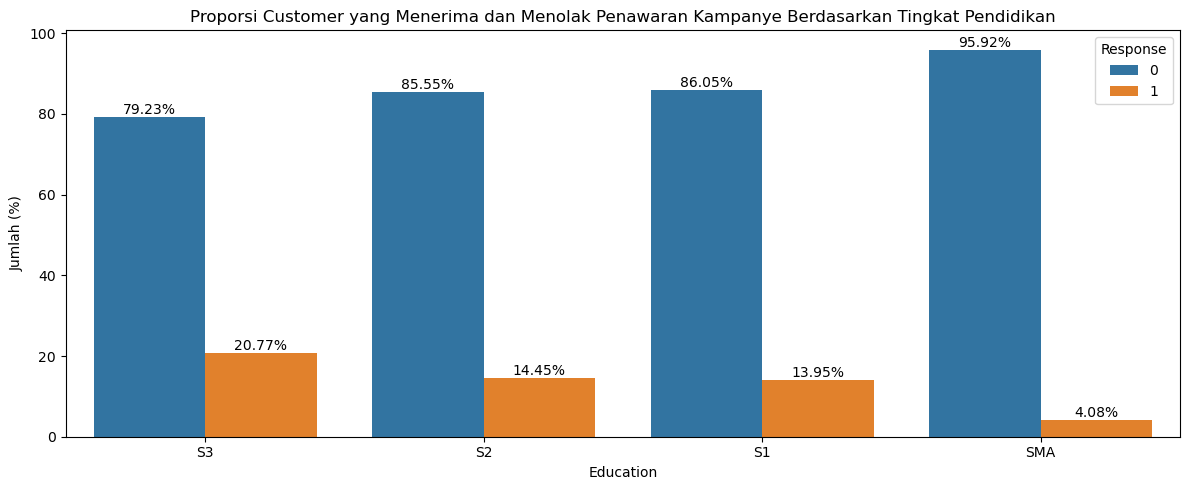

In [30]:
ct_edu = pd.crosstab(df['Education'],df['Response'],normalize='index')*100
display(ct_edu)
melt_ct_edu = pd.melt(ct_edu.reset_index(),'Education',[0,1]).sort_values(['Response','value'],ascending=False)
plt.figure(figsize=(12,5))
pct_education = sns.barplot(x='Education',y='value',hue='Response',data=melt_ct_edu)
for bar in pct_education.containers:
    pct_education.bar_label(bar,fmt='%.2f%%')
plt.title('Proporsi Customer yang Menerima dan Menolak Penawaran Kampanye Berdasarkan Tingkat Pendidikan')
plt.ylabel('Jumlah (%)')
plt.tight_layout()
plt.show()

In [31]:
_, pval, _,_=chi2_contingency(pd.crosstab(df['Education'],df['Response']))
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


* Pada jenjang pendidikan apa yang memiliki paling banyak customer yang menerima penawaran kampanye?
    * Customer supermarket paling banyak memiliki latar belakang pendidikan S1 dengan proporsi sebesar 50.17% dari total customer, tapi customer yang menerima penawaran kampanye paling banyak berdasarkan persentase berasal dari tingkat pendidikan S3.
* Dari uji statistik, tingkat pendidikan memiliki pengaruh signifikan terhadap customer dalam menerima atau menolak kampanye.  
    

## Berdasarkan Marital Status
* Apakah customer yang memiliki pasangan lebih banyak menerima penawaran kampanye atau justru customer yang tidak memiliki pasangan lebih banyak?

In [32]:
stat_res = pd.crosstab(df['Marital_Status'],df['Response'])
stat_res['Total'] = stat_res.sum(axis=1)
stat_res['Total_Percentage'] = stat_res['Total']/stat_res['Total'].sum()*100
stat_res

Response,0,1,Total,Total_Percentage
Marital_Status,,,,
in relationship,1154,147,1301,64.120256
not in relationship,562,162,724,35.682602
unknown,2,2,4,0.197141


Response,0,1
Marital_Status,,
in relationship,88.700999,11.299001
not in relationship,77.624309,22.375691


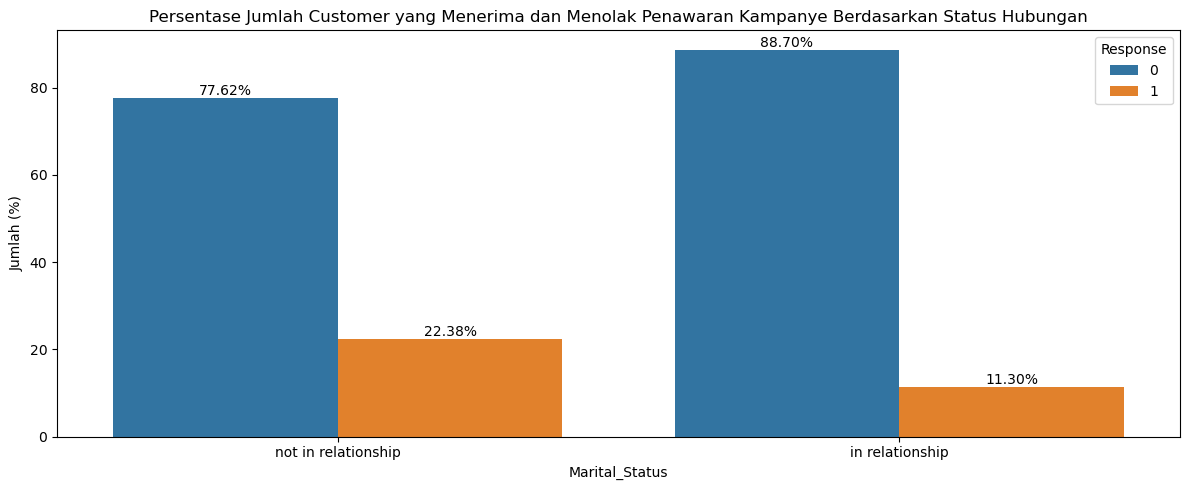

In [33]:
#Kita tidak memakai data dengan status hubungan unknown karena jumlah yang sedikit dan tidak jelas status hubungannya
ct_stat = pd.crosstab(df[df['Marital_Status']!='unknown']['Marital_Status'],df['Response'],normalize='index')*100
display(ct_stat)
melt_ct_stat = pd.melt(ct_stat.reset_index(),'Marital_Status',[0,1]).sort_values(['Response','value'],ascending=False)
plt.figure(figsize=(12,5))
pct_stat = sns.barplot(x='Marital_Status',y='value',hue='Response',data=melt_ct_stat)
for bar in pct_stat.containers:
    pct_stat.bar_label(bar,fmt='%.2f%%')
plt.title('Persentase Jumlah Customer yang Menerima dan Menolak Penawaran Kampanye Berdasarkan Status Hubungan')
plt.ylabel('Jumlah (%)')
plt.tight_layout()
plt.show()

* Apakah customer yang memiliki pasangan lebih banyak menerima penawaran kampanye atau justru customer yang tidak memiliki pasangan lebih banyak?
    * Dari crosstab di atas, mayoritas customer supermarket sudah berpasangan, meski demikian mayoritas customer yang menerima penawaran kampanye justru berasal dari customer yang tidak memiliki pasangan.

In [34]:
_, pval, _,_=chi2_contingency(pd.crosstab(df[df['Marital_Status']!='unknown']['Marital_Status'],df['Response']))
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


* Dari uji statistik, status hubungan memiliki pengaruh signifikan terhadap customer dalam menerima atau menolak kampanye.  

## Berdasarkan Income
* Apakah customer dengan Income yang semakin besar, cenderung menerima penawaran kampanye?
* Apakah perbedaan income antara kelompok customer yang menerima dan menolak kampanye signifikan atau tidak?

Text(0.5, 1.0, 'Distribusi Income Berdasarkan Target')

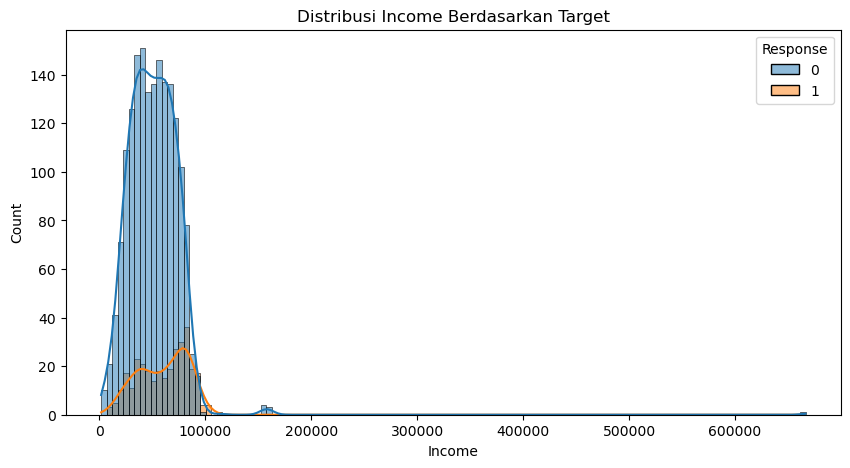

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Income',hue='Response',kde=True)
plt.title('Distribusi Income Berdasarkan Target')

* Apakah customer dengan Income yang semakin besar, cenderung menerima penawaran kampanye?
    * Dari histogram di atas, kita bisa melihat adanya kecenderungan customer dengan income lebih besar akan menerima penawaran kampanye,namun hal ini tidak berlaku untuk customer yang memiliki income yang sangat tinggi alias super kaya, ini bisa saja disebabkan oleh sedikitnya data point dengan income yang sangat tinggi, atau mungkin juga karena orang yang super kaya cenderung lebih bijak dalam menggunakan uangnya.(ref:[https://www.forbes.com/sites/forbesfinancecouncil/2021/06/17/16-habits-of-the-wealthy-anyone-would-be-wise-to-emulate/?sh=69ca856b6740])

In [34]:
# Cek Distribusi
stat,pval = normaltest(df['Income'])
if pval<=0.05:
    print('Distribusi tidak normal')
else:
    print('Distribusi normal')

Distribusi tidak normal


In [37]:
# Kita menggunakan mannwhitney untuk uji statistik two sample dengan distribusi tidak normal
stat,pval = mannwhitneyu(df[df['Response']==0]['Income'],df[df['Response']==1]['Income'])
if pval <= 0.05:
    print('Menolak H0')
else:
    print('Gagal Menolak H0')

Menolak H0


* Apakah perbedaan income antara kelompok customer yang menerima dan menolak kampanye signifikan atau tidak?
    * Setelah dilakukan uji statistik di atas, kita memutuskan untuk menolak H0 yang berarti memang ada perbedaan income yang signifikan antara kelompok yang menerima penawaran dan tidak menerima penawaran kampanye.

## Berdasarkan Anak : Kidhome, dan Teenhome
* Apakah jumlah anak mempengaruhi customer untuk menerima atau menolak penawaran kampanye?

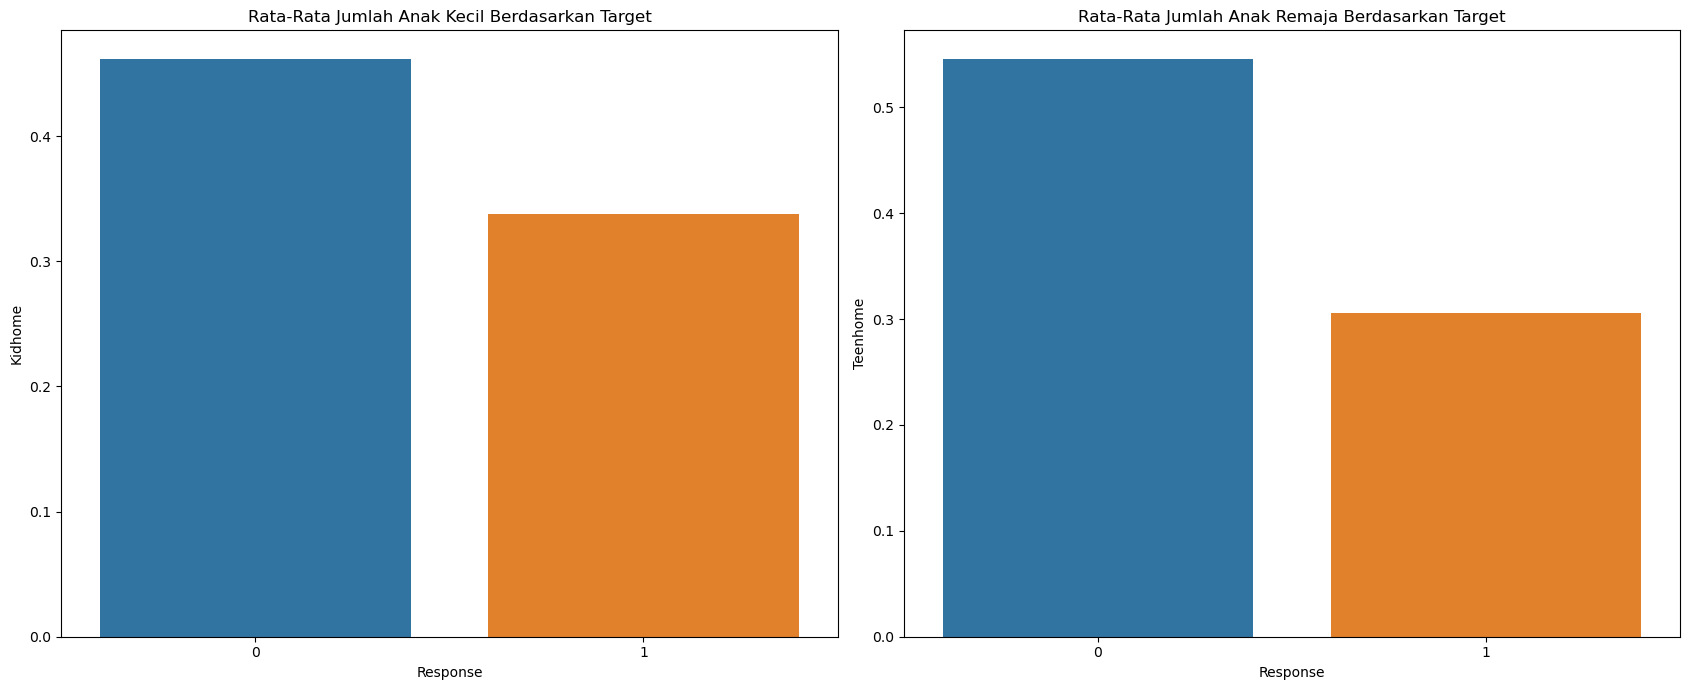

In [38]:
fig,ax = plt.subplots(1,2,figsize=(17,7))
sns.barplot(data=df,x='Response',y='Kidhome',ax=ax[0],errorbar=('ci',False))
sns.barplot(data=df,x='Response',y='Teenhome',ax=ax[1],errorbar=('ci',False))
ax[0].set_title('Rata-Rata Jumlah Anak Kecil Berdasarkan Target')
ax[1].set_title('Rata-Rata Jumlah Anak Remaja Berdasarkan Target')
plt.tight_layout()
plt.show()

* Sekilas kita lihat, rata-rata customer yang menerima penawaran kampanye cenderung memiliki anak yang lebih sedikit terlepas anak tersebut masih kecil ataupun sudah remaja.
* Kita akan coba lihat lebih detail distribusinya pada grafik di bawah.

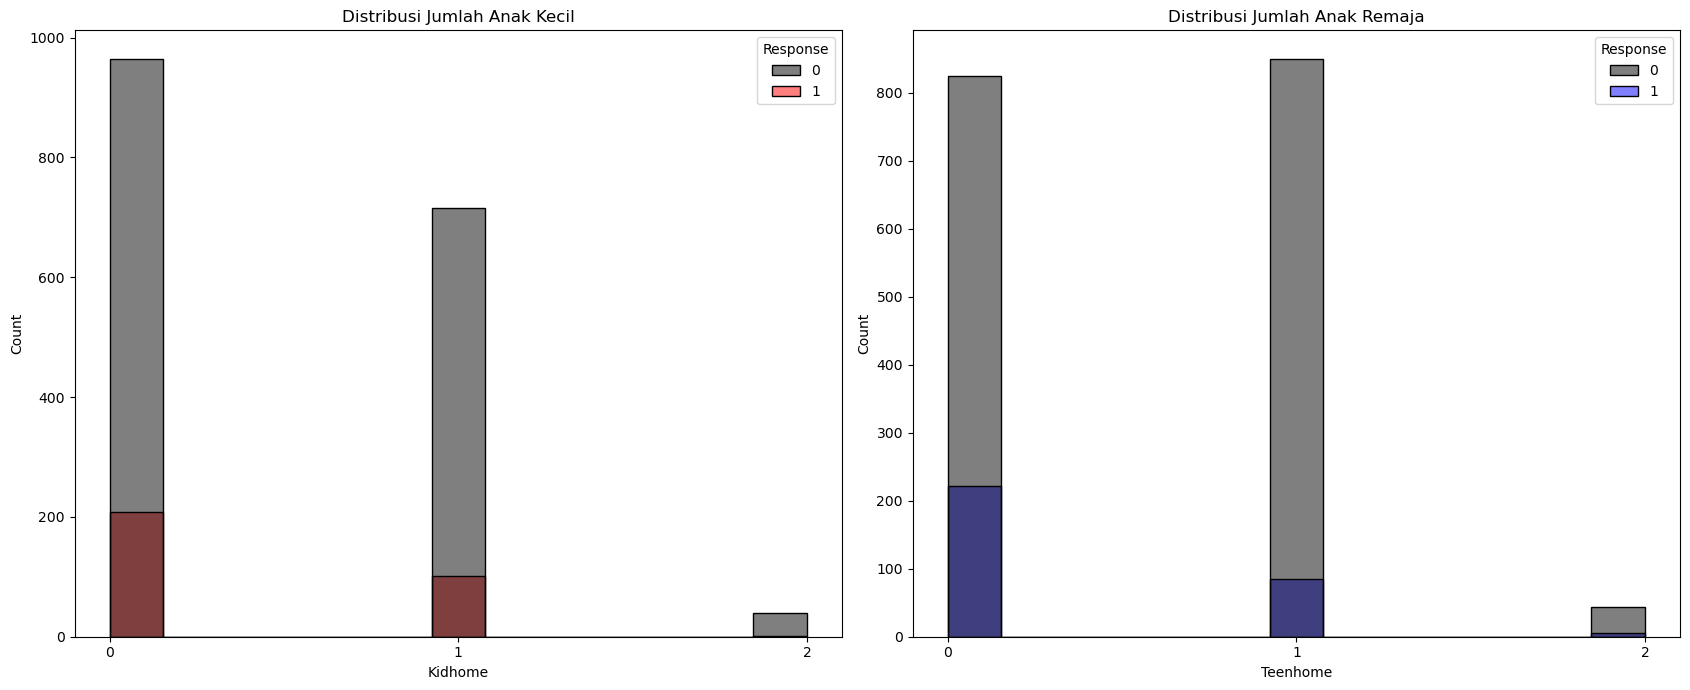

In [39]:
fig,ax = plt.subplots(1,2,figsize=(17,7))
sns.histplot(data=df,x='Kidhome',hue='Response',ax=ax[0],palette=['k','r'])
sns.histplot(data=df,x='Teenhome',hue='Response',ax=ax[1],palette=['k','b'])
ax[0].set_title('Distribusi Jumlah Anak Kecil')
ax[1].set_title('Distribusi Jumlah Anak Remaja')
ax[0].set_xticks([0,1,2])
ax[1].set_xticks([0,1,2])
plt.tight_layout()
plt.show()

* Apakah jumlah anak mempengaruhi customer untuk menerima atau menolak penawaran kampanye?
    * Ternyata setelah kita lihat distribusinya, kita bisa melihat dengan jelas customer yang tidak memiliki anak paling banyak menerima penawaran kampanye dari supermarket.Hal ini mungkin terjadi karena orang yang memiliki anak umumnya memiliki biaya hidup yang lebih tinggi dibandingkan yang tidak mempunyai anak, sehingga mereka akan cenderung membeli kebutuhan yang dirasa penting saja.

In [40]:
stat,pval = normaltest(df['Kidhome'])
if pval<=0.05:
    print('Distribusi tidak normal')
else:
    print('Distribusi normal')

stat,pval = normaltest(df['Teenhome'])
if pval<=0.05:
    print('Distribusi tidak normal')
else:
    print('Distribusi normal')

Distribusi tidak normal
Distribusi tidak normal


In [41]:
stat,pval = mannwhitneyu(df[df['Response']==0]['Kidhome'],df[df['Response']==1]['Kidhome'])
if pval <= 0.05:
    print('Menolak H0')
else:
    print('Gagal Menolak H0')

stat,pval = mannwhitneyu(df[df['Response']==0]['Teenhome'],df[df['Response']==1]['Teenhome'])
if pval <= 0.05:
    print('Menolak H0')
else:
    print('Gagal Menolak H0')

Menolak H0
Menolak H0


* Dari uji statistik di atas, ternyata memang terdapat perbedaan yang signifikan antara jumlah anak kelompok yang menerima dan menolak kampanye.

## Berdasarkan Waktu sejak Transaksi Terakhir(Recency)
* Apakah customer yang aktif berbelanja lebih banyak menerima penawaran kampanye dibanding customer yang kurang aktif?

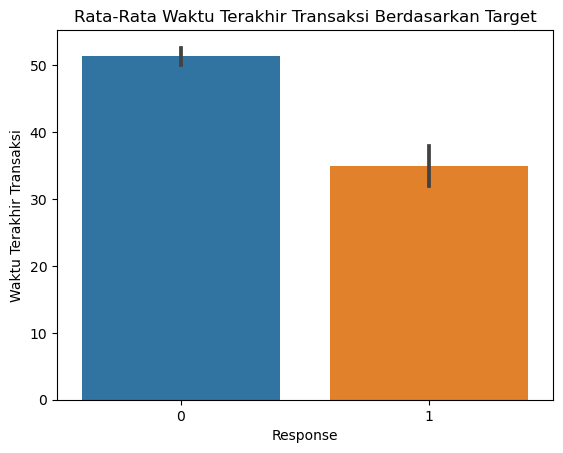

In [42]:
sns.barplot(x='Response',y='Recency',data=df)
plt.title('Rata-Rata Waktu Terakhir Transaksi Berdasarkan Target')
plt.ylabel('Waktu Terakhir Transaksi')
plt.show()

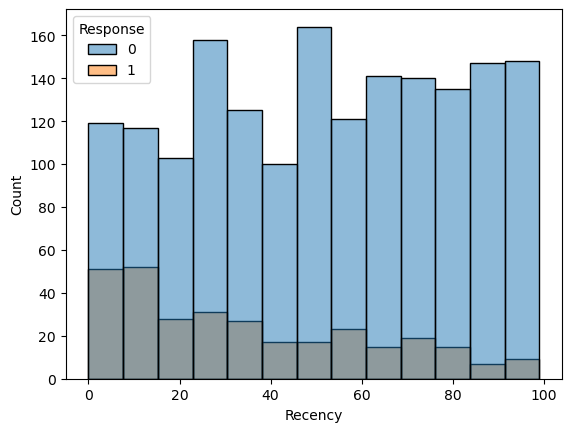

In [43]:
sns.histplot(data=df,x='Recency',hue='Response')
plt.show()

* Apakah customer yang aktif berbelanja lebih banyak menerima penawaran kampanye dibanding customer yang kurang aktif?
    * Dari barchart dan histogram di atas kita bisa melihat customer yang menerima penawaran kampanye mayoritas merupakan customer yang aktif berbelanja.Hal ini bisa saja terjadi karena orang yang aktif berbelanja lebih mudah terekspos dan tergiur oleh promo yang ditawarkan.

In [44]:
stat,pval = normaltest(df['Recency'])
if pval<=0.05:
    print('Distribusi tidak normal')
else:
    print('Distribusi normal')

Distribusi tidak normal


In [45]:
stat,pval = mannwhitneyu(df[df['Response']==0]['Recency'],df[df['Response']==1]['Recency'])
if pval <= 0.05:
    print('Menolak H0')
else:
    print('Gagal Menolak H0')

Menolak H0


* Setelah uji statistik, ternyata terdapat perbedaan waktu terakhir belanja yang signifikan antara kelompok yang menerima dan menolak kampanye.

## Berdasarkan Jumlah Nominal Pembelian Product : 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'
* Product apa yang penjualannya paling tinggi dalam 2 tahun terakhir?
* Apakah ada perbedaan signifikan antara jumlah pembelian produk kelompok yang menerima dan menolak kampanye?

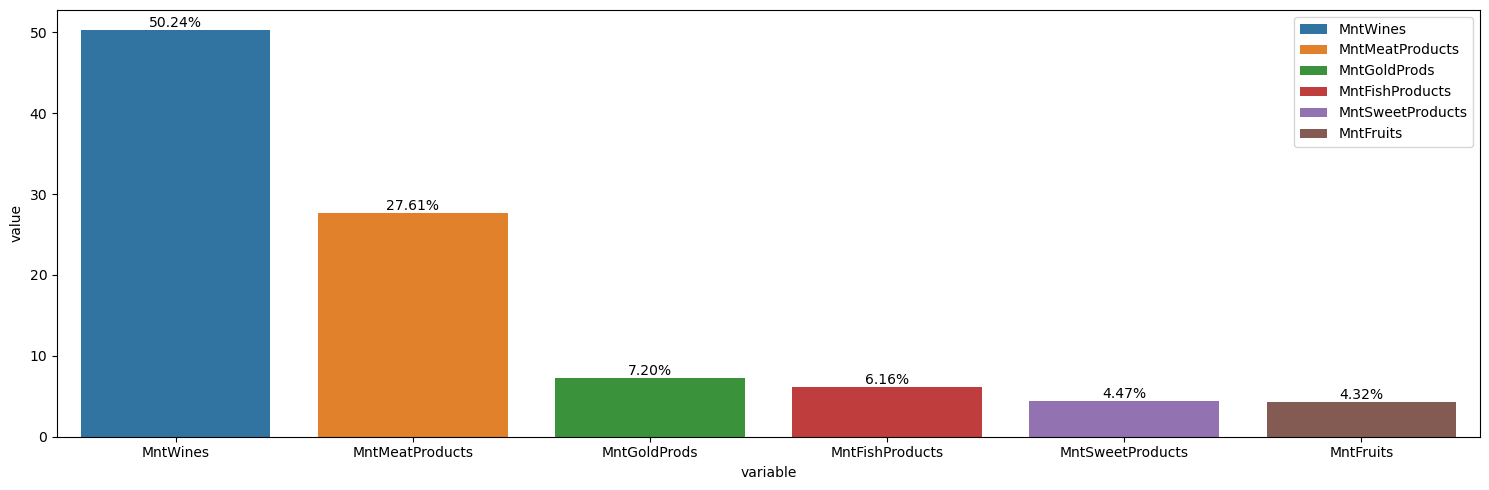

In [46]:
melt_mnt=pd.melt(df,value_vars=[col for col in df.columns if 'Mnt' in col])
grp_melt_mnt=melt_mnt.groupby('variable')['value'].sum()
grp_melt_mnt=(grp_melt_mnt/grp_melt_mnt.sum()*100).sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,5))
prod_bar = sns.barplot(data=grp_melt_mnt,x='variable',y='value',errorbar=('ci',False),label=grp_melt_mnt['variable'],
                       order=grp_melt_mnt['variable'])
prod_bar.bar_label(prod_bar.containers[0],fmt='%.2f%%')
plt.tight_layout()
plt.legend()
plt.show()

* Product apa yang penjualannya paling tinggi dalam 2 tahun terakhir?
    * Pada grafik di atas, produk dengan penjualan terbanyak dalam 2 tahun terakhir adalah Wines dan diikuti oleh produk daging.Dapat dilihat setengah dari total penjualan supermarket selama 2 tahun hanya dari penjualan wine saja.Penjualan produk daging juga berkontribusi lumayan pada total penjualan supermarket dengan proporsi 27.61%.

<Axes: xlabel='variable', ylabel='value'>

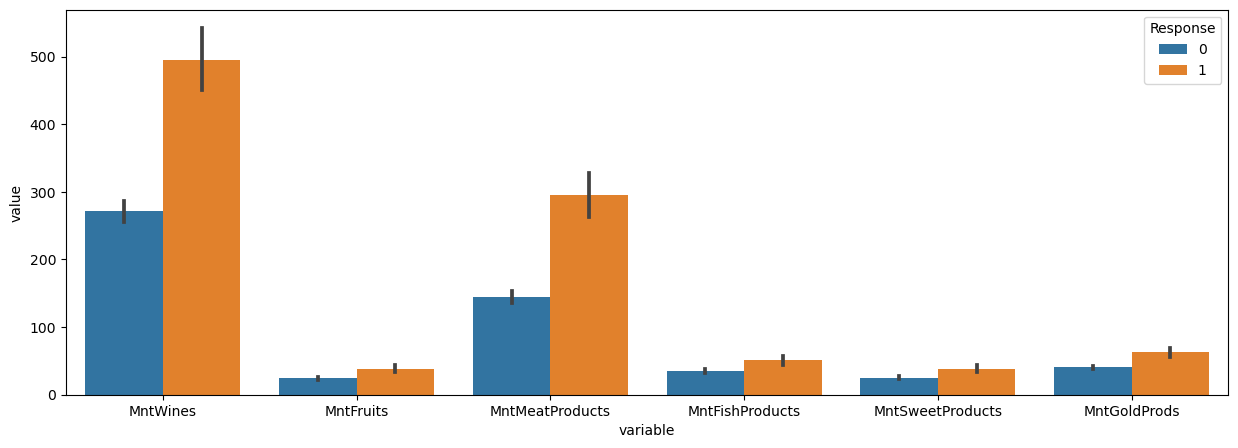

In [47]:
b=pd.melt(df,id_vars='Response',value_vars=[col for col in df.columns if 'Mnt' in col])
plt.figure(figsize=(15,5))
sns.barplot(data=b,x='variable',y='value',hue='Response')

* Di sini kita bisa melihat, semakin tinggi nominal pembelian product semakin besar juga kemungkinan customer tersebut akan menerima penawaran kampanye.

In [48]:
for col in [col for col in df.columns if 'Mnt' in col]:
    stat,pval = normaltest(df[col])
    if pval<=0.05:
        print(f'Kolom {col} memiliki distribusi tidak normal')
    else:
        print('Kolom {col} memiliki distribusi normal')

Kolom MntWines memiliki distribusi tidak normal
Kolom MntFruits memiliki distribusi tidak normal
Kolom MntMeatProducts memiliki distribusi tidak normal
Kolom MntFishProducts memiliki distribusi tidak normal
Kolom MntSweetProducts memiliki distribusi tidak normal
Kolom MntGoldProds memiliki distribusi tidak normal


In [49]:
for col in [col for col in df.columns if 'Mnt' in col]:
    stat,pval = mannwhitneyu(df[df['Response']==0]['Recency'],df[df['Response']==1]['Recency'])
    if pval <= 0.05:
        print(f'Hasil test {col} Menolak H0')
    else:
        print(f'Hasil test {col} Gagal Menolak H0')

Hasil test MntWines Menolak H0
Hasil test MntFruits Menolak H0
Hasil test MntMeatProducts Menolak H0
Hasil test MntFishProducts Menolak H0
Hasil test MntSweetProducts Menolak H0
Hasil test MntGoldProds Menolak H0


* Apakah ada perbedaan signifikan antara jumlah pembelian produk kelompok yang menerima dan menolak kampanye?
    * Dari hasil tes statistik, kita dapati adanya perbedaan signifikan antara jumlah nominal pembelian produk kelompok yang menerima dan menolak kampanye.

# Rekomendasi 
* Dari analisa yang dilakukan kita bisa melihat customer supermarket mayoritas berasal dari kelompok usia yang sudak cukup berumur, namun proporsi customer yang menerima kampanye tergolong masih sangat kecil $\pm$ 20%.Rekomendasi yang dapat dilakukan:
    * Penawaran promo kampanye bisa lebih banyak dilakukan melalui koran, tv, radio, atau flyer dengan tulisan yang mudah dibaca dan jelas agar dapat lebih mudah menjangkau customer yang berusia lebih tua karena mayoritas customer sudah cukup berumur. 
    * Kampanye juga bisa lebih difokuskan pada penekanan dari sisi kesehatan yang tentunya menarik bagi seluruh kalangan usia khususnya usia yang lebih tua. Halaman website supermarket juga bisa dibuat lebih user friendly dan juga disediakan tech support untuk mempermudah mayoritas customer dalam mengakses website.
    * Aktivitas kampanye bisa dilakukan pada pagi hari karena kalangan usia yang lebih tua cenderung berbelanja dan beraktivitas pada pagi hari
* 98% customer berasal dari kalangan sarjana, kita bisa meningkatkan acceptance ratio kampanye dengan menunjukkan kualitas, value yang ditawarkan produk.Karena mayoritas customer adalah kaum terpelajar, apabila kita menekankan aspek kesehatan saat kampanye kita bisa sertakan research yang dapat mendukung klaim kita untuk meningkatkan kepercayaan customer.
* Customer dengan jumlah anak yang lebih banyak cenderung menolak kampanye yang diberikan, kita bisa menawarkan paket keluarga.
* Banyak kampanye yang tidak diterima berasal dari customer yang memang sudah tidak aktif berbelanja di supermarket tersebut,hal ini mungkin saja karena customer telah berbelanja di supermarket lain dengan penawaran yang lebih menarik. Kita bisa melakukan research lebih lanjut untuk pesaing-pesaing dan mengirimkan penawaran khusus bagi customer yang sudah tidak aktif berbelanja.
